 matrix decomposition techniques.

We start with a term-document matrix:
    ![a](https://github.com/fastai/course-nlp/raw/aabfeddf61fea29b18c72f841d057b56a216b7eb/images/document_term.png)
    
that this representation does not take into account word order or sentence structure. It's an example of a bag of words approach.

目标： 基于一些不同类型的文档语料，使用Singular Value Decomposition (SVD)  和 Non-negative Matrix Factorization (NMF) 处理，进行分类

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

Data source: Newsgroups are discussion groups on Usenet, which was popular in the 80s and 90s before the web really took off. This dataset includes 18,000 newsgroups posts with 20 topics.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [3]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [9]:
print("\n".join(newsgroups_train.data[:1]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


In [10]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [11]:

newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int32)

In [12]:
num_topics, num_top_words = 6, 8

**Stop words, stemming, lemmatization**

In [14]:
from sklearn.feature_extraction import stop_words
import nltk
from nltk import stem
# nltk.download('wordnet')

d:\python3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [17]:
word_list = ['feet', 'foot', 'foots', 'footing']

[wnl.lemmatize(word) for word in word_list],[porter.stem(word) for word in word_list]

(['foot', 'foot', 'foot', 'footing'], ['feet', 'foot', 'foot', 'foot'])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

In [20]:
vectorizer = CountVectorizer(stop_words='english') #, tokenizer=LemmaTokenizer())
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [21]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(26576,)

![1](https://github.com/fastai/course-nlp/raw/aabfeddf61fea29b18c72f841d057b56a216b7eb/images/svd_fb.png)

SVD is extremely widely used in linear algebra, and specifically in data science, including:

semantic analysis
collaborative filtering/recommendations (winning entry for Netflix Prize)
calculate Moore-Penrose pseudoinverse
data compression
principal component analysis

In [22]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

MemoryError: 

In [24]:
m,n=vectors.shape
d=5  # num topics

In [25]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

MemoryError: 


# TF-IDF
Topic Frequency-Inverse Document Frequency (TF-IDF) is a way to normalize term counts by taking into account how often they appear in a document, how long the document is, and how commmon/rare the term is.

TF = (# occurrences of term t in document) / (# of words in documents)

IDF = log(# of documents / # documents with term t in it)

In [26]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [27]:
newsgroups_train.data[10:20]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [30]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [28]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [31]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

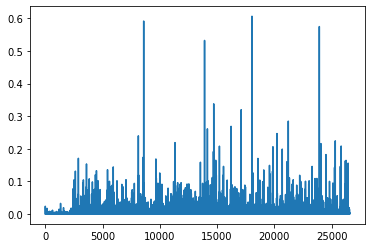

In [32]:
plt.plot(clf.components_[0])

In [33]:
clf.reconstruction_err_

43.71292605795255